## Supervised Learning
## Project: Finding Donors for *CharityML*

In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(10))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
data.income.dtype

dtype('O')

In [3]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data['income']=='>50K'])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['income']=='<=50K'])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = len(data[data['income']=='>50K'])*100/len(data)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

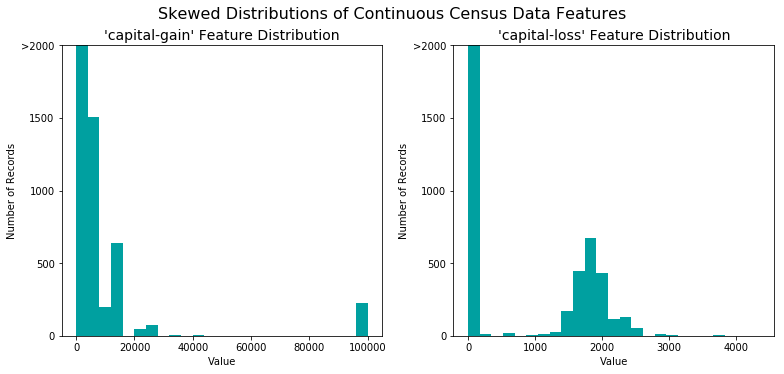

In [4]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

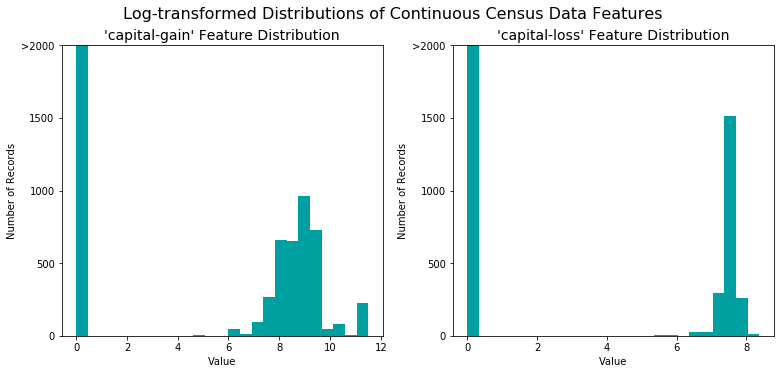

In [5]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)


### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [6]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [7]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform,columns=['workclass','education_level','marital-status','occupation','relationship','race','sex','native-country'])

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.map({'<=50K':0,'>50K':1})

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

In [8]:
income_raw

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
5        <=50K
6        <=50K
7         >50K
8         >50K
9         >50K
10        >50K
11        >50K
12       <=50K
13       <=50K
14       <=50K
15       <=50K
16       <=50K
17       <=50K
18        >50K
19        >50K
20       <=50K
21       <=50K
22       <=50K
23       <=50K
24        >50K
25       <=50K
26       <=50K
27       <=50K
28       <=50K
29       <=50K
         ...  
45192    <=50K
45193    <=50K
45194     >50K
45195     >50K
45196    <=50K
45197     >50K
45198     >50K
45199    <=50K
45200    <=50K
45201    <=50K
45202    <=50K
45203    <=50K
45204     >50K
45205    <=50K
45206    <=50K
45207    <=50K
45208    <=50K
45209    <=50K
45210    <=50K
45211    <=50K
45212    <=50K
45213    <=50K
45214    <=50K
45215    <=50K
45216    <=50K
45217    <=50K
45218    <=50K
45219    <=50K
45220    <=50K
45221     >50K
Name: income, Length: 45222, dtype: object

#  Recognize the best predictor features for our target label income

In [9]:
features_log_minmax_transform.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.037623,0.122068,0.055331,0.101992
education-num,0.037623,1.000000,0.129347,0.078967,0.146206
capital-gain,0.122068,0.129347,1.000000,-0.066899,0.086098
capital-loss,0.055331,0.078967,-0.066899,1.000000,0.051587
hours-per-week,0.101992,0.146206,0.086098,0.051587,1.000000


Since the above variables are only numeric, correlation results were returned only for these. To analyze the feature importance of all the features, we will encode the remaining variables to visualize their significance individually with income.

In [10]:
#Creating a separate dataframe with encoded features and target variable to evaluate feature importances later
data2=features_log_minmax_transform
data2.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


Fetching the income column from the first dataframe

In [11]:
data2['income']=data['income']
data2['income'] = data2['income'].map({'<=50K':0,'>50K':1})
data2.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States,0
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,0
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,0
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,0
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,0


In [12]:
#LabelEncoding the variables in a separate dataframe
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data2.iloc[:,1] = labelencoder.fit_transform(data2.iloc[:,1].values)
data2.iloc[:,2] = labelencoder.fit_transform(data2.iloc[:,2].values)
data2.iloc[:,4] = labelencoder.fit_transform(data2.iloc[:,4].values)
data2.iloc[:,5] = labelencoder.fit_transform(data2.iloc[:,5].values)
data2.iloc[:,6] = labelencoder.fit_transform(data2.iloc[:,6].values)
data2.iloc[:,7] = labelencoder.fit_transform(data2.iloc[:,7].values)
data2.iloc[:,8] = labelencoder.fit_transform(data2.iloc[:,8].values)
data2.iloc[:,12] = labelencoder.fit_transform(data2.iloc[:,12].values)

In [13]:
data2.corr()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.085892,-0.003511,0.037623,-0.271623,-0.004474,-0.247564,0.023776,0.082053,0.122068,0.055331,0.101992,-0.003180,0.237040
workclass,0.085892,1.000000,0.017846,0.040779,-0.033221,0.017508,-0.065049,0.049765,0.069638,0.016905,0.005462,0.051366,0.003889,0.015659
education_level,-0.003511,0.017846,1.000000,0.347444,-0.041520,-0.033499,-0.013179,0.011457,-0.027569,0.028402,0.016755,0.060887,0.077893,0.081196
education-num,0.037623,0.040779,0.347444,1.000000,-0.064986,0.089686,-0.088431,0.031655,0.003417,0.129347,0.078967,0.146206,0.092994,0.332800
marital-status,-0.271623,-0.033221,-0.041520,-0.064986,1.000000,0.016399,0.180436,-0.070302,-0.120008,-0.062991,-0.036182,-0.183178,-0.022721,-0.192711
occupation,-0.004474,0.017508,-0.033499,0.089686,0.016399,1.000000,-0.051644,-0.000026,0.056625,0.014186,0.015638,0.016160,-0.002848,0.049787
relationship,-0.247564,-0.065049,-0.013179,-0.088431,0.180436,-0.051644,1.000000,-0.118584,-0.582974,-0.083417,-0.055124,-0.259194,-0.007144,-0.253402
race,0.023776,0.049765,0.011457,0.031655,-0.070302,-0.000026,-0.118584,1.000000,0.088935,0.023586,0.019749,0.044738,0.124342,0.070844
sex,0.082053,0.069638,-0.027569,0.003417,-0.120008,0.056625,-0.582974,0.088935,1.000000,0.068947,0.043292,0.231425,-0.004170,0.215760
capital-gain,0.122068,0.016905,0.028402,0.129347,-0.062991,0.014186,-0.083417,0.023586,0.068947,1.000000,-0.066899,0.086098,0.011994,0.287740


# Arrange the features correlated with income   

In [14]:
importances = data2.drop("income", axis=1).apply(lambda x: x.corr(data2.income))
indices = np.argsort(importances)
print(importances[indices])

relationship      -0.253402
marital-status    -0.192711
workclass          0.015659
native-country     0.020103
occupation         0.049787
race               0.070844
education_level    0.081196
capital-loss       0.139253
sex                0.215760
hours-per-week     0.227199
age                0.237040
capital-gain       0.287740
education-num      0.332800
dtype: float64


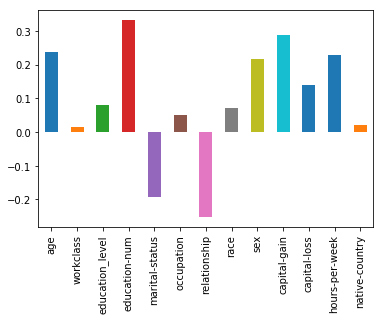

In [15]:
#Visualizing the importances of features with target income
importances.plot.bar()

From the graph, the highly correlated features with the target income are age,education-num, marital-status, relationship, sex, capital-gain,capital-loss and hours-per-week(considering both negative and positive correlations). 

In [16]:
#Analyzing correlation between independent variables, and keeping only one of them to avoid redundancy
data2[['relationship','sex']].corr()

,relationship,sex
relationship,1.000000,-0.582974
sex,-0.582974,1.000000


Retaining only feature 'sex' and eliminating 'relationship'

In [17]:
data2[['sex','age']].corr()

,sex,age
sex,1.000000,0.082053
age,0.082053,1.000000


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [18]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 10)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [19]:
#Taking beta as 0.5 since we are concerned more about precision i.e. classifying precisely the people earning more than 50K
beta=0.5
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
#encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = (TP+TN)/(FP+FN+TP+TN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1+beta**2)*precision*recall/((beta**2*precision)+recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


# Naive Predictor Results

#### Though, it does not make sense to consider the assumption that every single person makes more than 50K. The purpose of naive prediction is to set the benchmark and realize the potential of an unintelligent model. Hence, in this case there is no false negative and true negative. The accuracy is precision in this case (TP/(TP+FP). The recall is 1 since there is no false negative. Since, the F-score tends to move towards the lesser value of the two(precision and recall), we got the following results as expected.
Accuracy/Precision Score: 24.78% and F-score: 29.17%

###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: **

**Support Vector Machines**

Applications- Support Vector Machines are widely used in bioscience, text and hypertext categorization, and classification of images. The ability to classify text is fascinating. It uses training data to classify different document texts such as news, articles, web pages and emails. For example, SVM models can differentiate a news into several ways like business, sports, entertainment, etc.

Strengths- SVMs are very effective when the number of features are more than the number of samples. The outliers have low impact on the model because the hyperplane is affected by only the support vectors. SVMs are capable to handle higher dimensional data, hence fast to train/test without using the non-linear kernels. It is one of the best algorithms when classes are separable and perfectly suitable for binary classification problems.

Weakness- SVMs have this feature of kernel trick to select kernels like linear, polynomial, gaussian and so on. Sometimes selecting the correct kernel type is tricky. The non-linear kernels are computationally slow when dealing with large datasets. SVMs are also not prone to overlapping classes. Selecting suitable hyperparameters in SVM for better generalization can also be a daunting task at times. 

Suitability- Given the imbalance of class in our data and a problem from the book of binary classification, SVM is one of the appropriate choices. Moreover, since our data is not so large, linear SVC would perform decent both in terms of speed and accuracy than a non-linear SVC for our case.

References- 

https://www.intechopen.com/books/advances-in-character-recognition/svm-classifiers-concepts-and-applications-to-character-recognition

https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589

**AdaBoost Classifier**

Applications- AdaBoost is used in real world problems such as customer churn prediction, classification of customers and face detection applications. It is used in Voila Jones face detection which has a rejection cascade of layers of AdaBoost classifiers. If any detection window does not recognize face , it rejects and moves on to the next one. AdaBoost is used for feature selection and hence reduces the associated computational costs.

Strengths- AdaBoost algorithms improve the predictive power of weak classifiers. Hence, they use weak classifiers for cascading very efficiently. Different sets of weak algorithms can be used in AdaBoost, hence it is not restricted to a single type of weak learner. It overcomes the problem of random guessing, taking each classfier weight into consideration resulting in a stronger model. AdaBoost ensemble technique allows to capture non-linear relationships in data, hence eliminating the flaws of linear models to facilitate better prediction results. 

Weakness- The weak classifiers in the model being weak lead to overfitting and low margins if not tuned properly. The data imbalance sometimes results in inaccurate classification accuracy.The training and prediction of the model is often time consuming process and it is also vulnerable to uniform noise. 

Suitability- AdaBoost extends beyond binary classfication problems, hence the boosting technique can be used to make more accurate predictions. AdaBoost has a high degree of precision which is an apt requirement in our case, since our focus is on correctly identifying the donors with income more than 50K. Our dataset contains both numeric and textual data. AdaBoost is flexible with different data types.

References-

https://www.educba.com/adaboost-algorithm/

https://easyai.tech/en/ai-definition/adaboost/

**Gradient Boosting Classifier**

Applications- Gradient Boosting (GB) algorithms find its use in a variety of problems such as sentiment analysis, text classification, and even Electromyography (EMG) to classify human muscle activities based on EMG sensor readings. 

Strengths- Gradient Boosting models improve the performance of weak learners similar to AdaBoost. This ensemble technique performs better because instead of reweighting the weak classfiers, it makes predictions based on the residual loss using gradients. The training and prediction time is considerable given its high prediction accuracy. GB models have the ability to build sparse models even with high dimensional data. They are flexible and can be customized to different needs given they can capture non-linear relationships.

Weakness- One of the drawback of Gradient boosting is its memory consumption. The problem arises when we have to store a high number of weak learners. Further, GB models minimize the errors to the point that it might cause overfitting. This might require using cross validation instead. The high flexibility to tune the hyperparameters requires large grid search during tuning which can be a tiring process.

Suitability: Gradient Boosting allows for more accurate and precise scores because of its boosting technique. Given our data, GB models can handle the imbalance in data quite efficiently by training the incorrectly classified incomes(=<50K) repeatedly till the errors are minimized to a certain threshold.

References-

http://uc-r.github.io/gbm_regression

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3885826/

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [20]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, fbeta_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

##### After exploring different models, evaluating the top 3 models

LinearSVC trained on 361 samples.
LinearSVC trained on 3617 samples.
LinearSVC trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.


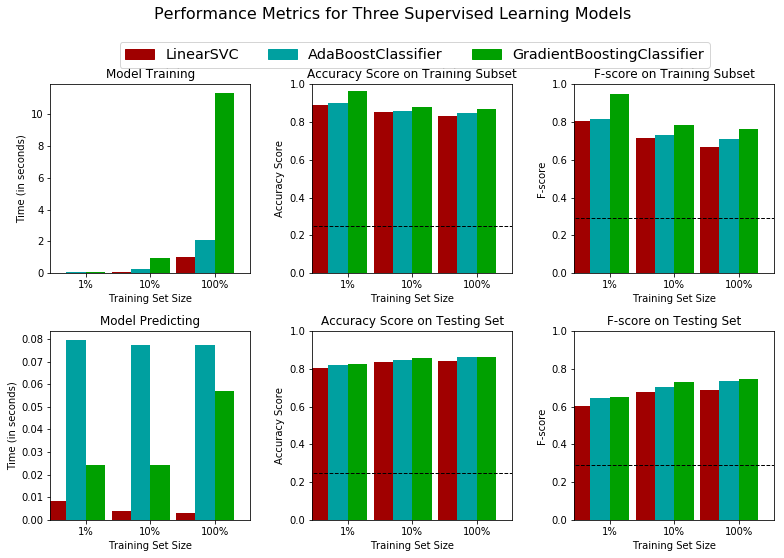

In [21]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC

# TODO: Initialize the three models
clf_A = LinearSVC(random_state=5)
clf_B = AdaBoostClassifier(random_state=5)
clf_C = GradientBoostingClassifier(random_state=5)
#clf_D =BaggingClassifier(random_state=42)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = int(len(y_train))
samples_10 = int(0.1*samples_100)
samples_1 = int(0.01*samples_100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **

**Selecting the best model**

From the results obtained above, Gradient Boosting Classifier is the most appropriate model for classifying income. The priority of the task at hand is to be absolutely precise when differentiating incomes. An inaccurate classification would cause the non-profit organization to request donation from an individual whose income is below 50K. Hence, this would reduce the likelihood of recieving donations. The F Score is the top metric to evaluate the results rather than the accuracy score since we are focusing on precision than recall in this case. When training the models, GradientBoosting and AdaBoost both improved linearly as we increased the sample size of the training data, whereas Support Vector Machines(LinearSVC) did not demonstrate any improvement. Though AdaBoost Classifier is fairly close, it cannot be chosen as the optimal model especially when model prediction time is the second priority. Gradient Boosting Classifier takes significantly more time to train than AdaBoost but it's model prediction time is spot on and AdaBoost is computationally the slowest consuming twice the time taken by GradientBoost for making predictions on the testing dataset. 

In binary classification problems, we try to predict whether a given data point belongs to a particular class or not. One of the challenges in this dataset we came across was the imbalance of class. Only 24.78% of people have income more than 50K. This is how real-time data looks like and hence, class imbalance is one of the important characteristics to take into account. Gradient Boosting (GB) eliminates the need to apply additional techniques such as stratification which deal with class imbalance. GB models construct training sets based on incorrectly classified samples. It identifies the flaws of the weak learners (which have low performance metrics) and makes the model better by boosting the focus directly on the residual errors using gradients. It allows to optimize different types of loss functions along with the flexibility to tune hyperparameters. It is the one of the ideal choices in our case as it allows more control over AdaBoost.

References:

https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab

https://towardsdatascience.com/practical-tips-for-class-imbalance-in-binary-classification-6ee29bcdb8a7

https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: **

Gradient Boosting Classifiers belong to the category of supervised machine learning algorithms called boosting ensemble methods. The idea behind Gradient Boosting is to combine the weak learning algorithms and make more accurate predictions.

A weak learner is a machine learning algorithm that gives better accuracy than simple guessing. For instance, if you are trying to classify flowers, a learner which classifies roses accurately than sunflowers, then it is a weak learner. Because it can atleast classify roses correctly, which is better than random guessing. If a learner classifies every flower as a rose, then it would not be a weak learner since it is not any better than guessing. For boosting problems, the best types of weak learners are those that are very accurate, even if it is accurate for a selected scope in a problem. This way, if weak leaner 1 can be accurate in classifying roses, weak learner 2 can focus on sunflowers, and so on. Essentially, weak learners are best combined to work on a subsection of problem, hence making the boosting process efficient. 

Weak learners can be any machine learning algorithm such as neural network, svm, but the most commonly used weak learner is decision tree. A decision tree is basically a a type of flowchart which gives an answer in yes or no. In our case, the decision tree output is whether an individual earns above 50k or not. The input are the features like age, education, etc which are used to make a decision.

During the training process, the boosting algorithm focuses more on inaccurate predictions, and prioritizes the correct prediction of those in the next round of training. Every next iteration, the model finds the best learner (or decision tree) to incorporate into the ensemble, and leverage this process till any more corrections can be made further. All these learners are  combined to make a final ensembled model. Among them, they vote and the majority of votes decides the winner who makes the final prediction. Thus, using the census data, the boosting model can predict the income for a potential new donor and find out if they earn more than 50K or not, and thus making a decision yes/no on the likelihood of getting a donation.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

### Grid Search on Gradient Boosting Classifier

In [22]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = GradientBoostingClassifier(random_state=5)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = { 'learning_rate':[0.075,0.1,0.25],'n_estimators':[100,150,200]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=0.5)
start=time()
# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters,scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)
end=time()

Gridsearch_time=end-start

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("Time elapsed in seconds:\n",Gridsearch_time)
print ("Best gridsearch parameters\n------")
print (grid_fit.best_params_)
print ("")

Unoptimized model
------
Accuracy score on testing data: 0.8646
F-score on testing data: 0.7461

Optimized Model
------
Final accuracy score on the testing data: 0.8702
Final F-score on the testing data: 0.7533
Time elapsed in seconds:
 283.07689476013184
Best gridsearch parameters
------
{'learning_rate': 0.25, 'n_estimators': 150}



In [23]:
best_clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.25, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              presort='auto', random_state=5, subsample=1.0, verbose=0,
              warm_start=False)

### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |0.8646|0.8702|
| F-score        |0.7461|0.7533|


**Answer: **

The optimized model's accuracy score and F-score on the testing data is 87.02% and 75.33% respectively. The scores are better than the unoptimized model. The optimized model is 0.64% more accurate and 0.72% more precise on the predictions using the test data. It is 252.3 % more accurate and 158.8 % more precise. The optimized model has yielded far better performance metrics compared to the naive predictor benchmark. 

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**


**During the exploratory data analysis on top (executed below again), I found the correlation of the features with the target label income. The top features out of the 13 features were as follows-**

1. age
2. education-num
3. marital-status
4. relationship 
5. sex
6. capital-gain
7. capital-loss
8. hours-per-week 

Out of these, I eliminated the feature relationship because it was highly correlated with the feature sex. Based on the correlation score above, I eliminated capital-loss & marital-status. Hence, remaining with the below 5 features with in descending order of importance and the reasons why they should be important- 

1. education-num- It signifies the level of education such as doctorate, bachelors, masters. The higher the degree (education-num here), more income would be earned.
2. capital-gain- It measures what is the profit of an individual from a sale of capital asset. Income is directly dependent on capital-gain.
3. age- Older people tend to earn more income given their experience.
4. hours-per-week- The more hours an individual works in a week given week, the more their income. Even with a same hourly wage, if the number of hours increase the income would eventually be more.
5. sex- It often happens that men are paid more than the women. So, sex could be an important factor.


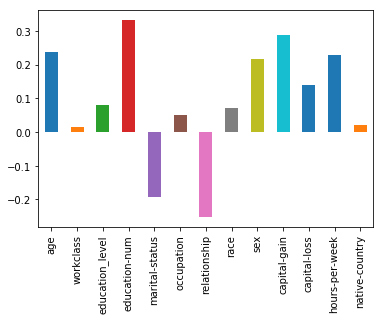

In [25]:
#Correlation score of the features:

#Visualizing the importances of features with target
importances.plot.bar()

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

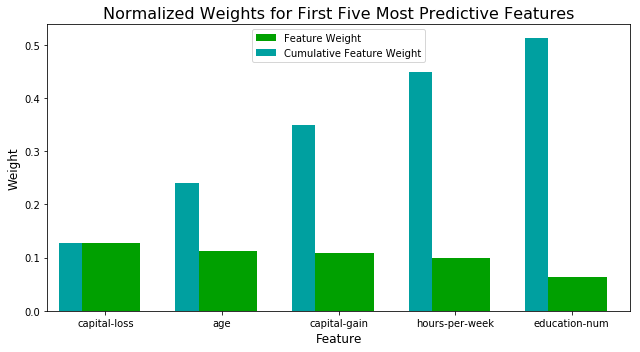

Training time with 13 features in seconds
 12.66263198852539


In [26]:
from sklearn.ensemble import GradientBoostingClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
start=time()
model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.25, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              presort='auto', random_state=5, subsample=1.0, verbose=0,
              warm_start=False)
model.fit(X_train,y_train)
end=time()
training_time=end-start

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)
print ("Training time with 13 features in seconds\n",training_time)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

I evaluated 4 out of the 5 features correctly during the EDA phase. However, the ranking of the features was a bit different. Nonethless, these make sense because income is essentially derived from how much a person works i.e. (the hours per week), age- a crucial factor, education-num meaning the level of education of a donor. Academically qualified individuals will possibly earn more than 50K. Capital gain makes sense because it gives information about the investments of the donor. Hence, it would provide a better idea about their financial status. Lastly, the feature sex which I predicted did not grab a place in the top five. Understandly so, because sex has only 2 values- male or female and it may be difficult to draw patterns on their income relying only on the two values. Instead capital loss is more relevant since it complements capital gain and more so using both these data points, the financial status of an indivual would be even more interpretable, hence resulting in an overall stronger predictive power. 

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [27]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

start=time()

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

end=time()

training_time=end-start

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}\n".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))
print ("Training time with 5 features in seconds\n",training_time)


Final Model trained on full data
------
Accuracy on testing data: 0.8702
F-score on testing data: 0.7533

Final Model trained on reduced data
------
Accuracy on testing data: 0.8446
F-score on testing data: 0.7102

Training time with 5 features in seconds
 1.7251193523406982


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

The final model's performance metrics are not so bad given we are using only 5 features. The new F-score is 4.31% less and the accuracy score is 2.94% less than the final model which was tested with all the 13 features.  

If training time is a factor, the model with 5 features should definitely be used since it is wicked fast compared to the model trained with 13 features. The new reduced model is 86% faster than the previous model.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

## Before You Submit
You will also need run the following in order to convert the Jupyter notebook into HTML, so that your submission will include both files.

In [28]:
!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook finding_donors.ipynb to html',
 '[NbConvertApp] Writing 581704 bytes to finding_donors.html']